In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/passengers_train.csv"
air_passengers_dataframe = pd.read_csv(csvfile_link);
import datetime
air_passengers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             144 non-null    int64  
 1   time           144 non-null    float64
 2   AirPassengers  144 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.5 KB


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(air_passengers_dataframe[:-12] , 'time' , 'AirPassengers', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.std:START_TRAINING 'AirPassengers'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['AirPassengers']' 1.6179139614105225
INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Length=132  Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AirPassengers' Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_AirPassengers_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=

INFO:pyaf.std:MODEL_L1 L1_Fit=6.6616086574267035 L1_Forecast=8.471185219450993 L1_Test=22.277082170777792
INFO:pyaf.std:MODEL_L2 L2_Fit=8.553917012084726 L2_Forecast=11.971762904662405 L2_Test=23.591231598021093
INFO:pyaf.std:MODEL_LnQ LnQ_Fit=0.2170729956559861 LnQ_Forecast=0.022572182527746683 LnQ_Test=0.04384420712554154
INFO:pyaf.std:MODEL_MEDIAN_AE MedAE_Fit=5.876278580989805 MedAE_Forecast=4.912484110765718 MedAE_Test=19.789555964306714
INFO:pyaf.std:MODEL_COMPLEXITY 40
INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_START
INFO:pyaf.std:SIGNAL_TRANSFORMATION_MODEL_VALUES NoTransf None
INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_END
INFO:pyaf.std:TREND_DETAIL_START
INFO:pyaf.std:LINEAR_RIDGE_TREND LinearTrend (114.90523344816313, array([197.60619977]))
INFO:pyaf.std:TREND_DETAIL_END
INFO:pyaf.std:CYCLE_MODEL_DETAIL_START
INFO:pyaf.std:ZERO_CYCLE_MODEL_VALUES _AirPassengers_LinearTrend_residue_zeroCycle 0.0 {}
INFO:pyaf.std:CYCLE_MODEL_DETAIL_END
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(air_passengers_dataframe, 12);


INFO:pyaf.std:START_FORECASTING '['AirPassengers']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['AirPassengers']' 0.3728151321411133
INFO:pyaf.std:START_FORECASTING '['AirPassengers']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['AirPassengers']' 0.350449800491333
INFO:pyaf.std:START_FORECASTING '['AirPassengers']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['AirPassengers']' 0.35019564628601074


<AxesSubplot:xlabel='time'>

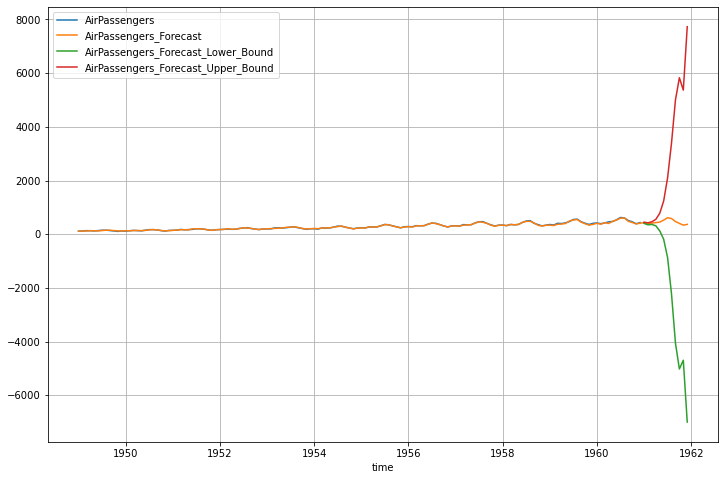

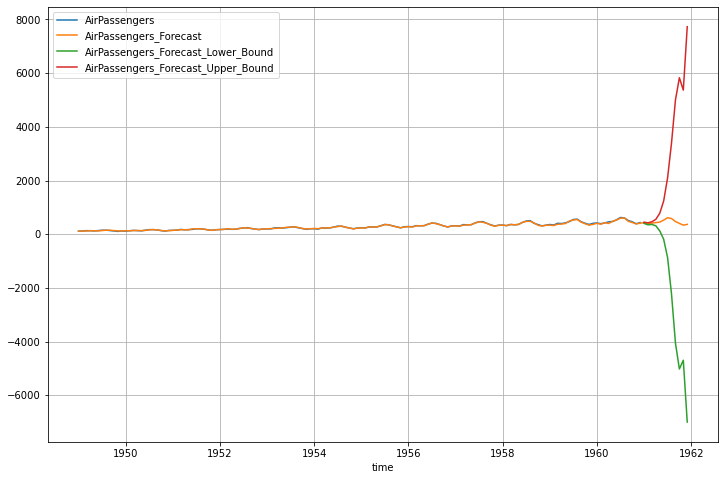

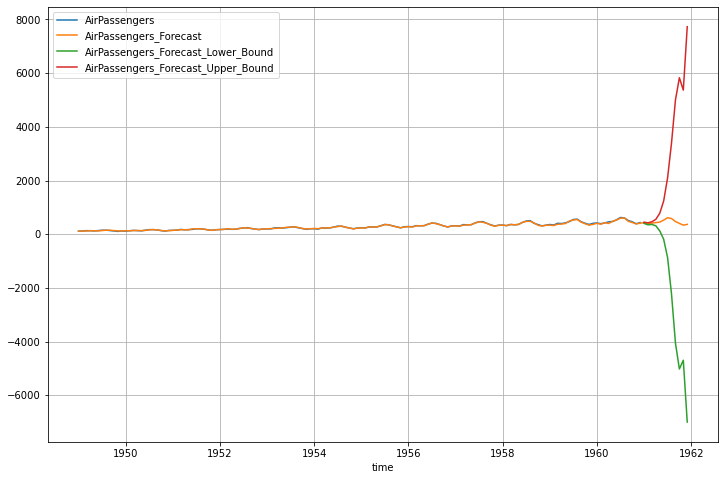

In [6]:
model_no_cross_valid_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
